In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data set

In [2]:
df=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


### Descriptive Analysis of the Data set

In [4]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


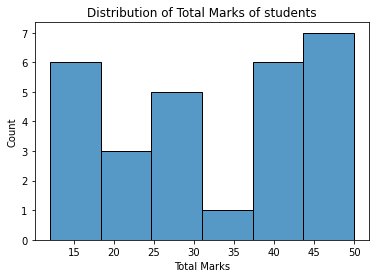

In [20]:
sns.histplot(x='Total Marks',data=df)
plt.title('Distribution of Total Marks of students')
plt.show()

In [5]:
df.describe(include=['object'])

,Gender,Test preparation
count,28,28
unique,2,2
top,female,none
freq,16,21


In [7]:
df['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

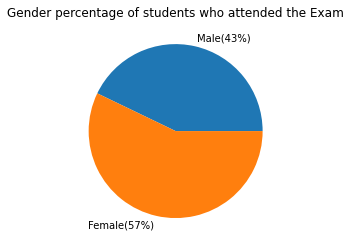

In [23]:
Gender = ['Male(43%)','Female(57%)']
Data = [12,16]
plt.pie(Data, labels = Gender)
plt.title('Gender percentage of students who attended the Exam')
plt.show()

In [9]:
df['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

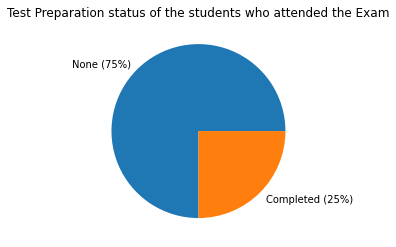

In [22]:
Test = ['None (75%)','Completed (25%)']
Data = [21,7]
plt.pie(Data, labels = Test)
plt.title('Test Preparation status of the students who attended the Exam')
plt.show()

## Hypothesis test on Scores (t-test)

Here we are checking whether female & male students scored the same marks

**H0: Marks of both male & female students are same**

**H1:Marks of both the students differ**

Calculation of t statistic

In [11]:
a=df[df['Gender']=='female']['Total Marks']
b=df[df['Gender']=='male']['Total Marks']

In [12]:
from scipy import stats
t_value,p_value=stats.ttest_ind(a,b)
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 0.694089
p-value for two tailed test is 0.493782


since p value > 0.05 we accept H0. i.e; **Male & female students has scored the same marks**

### Visualization

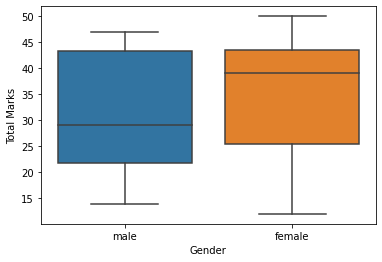

In [13]:
sns.boxplot(x='Gender',y='Total Marks',data=df)
plt.show()

**From the above boxplot its very clear that the mark distribution of females and males is almost alike**

##  To check whether test preparation helps the students (t-test)

**H0: Test preparation has no effect on students performance**

**H1: Test preparation effected in increasing student's Marks**

calculation of t statistic 

In [14]:
c=df[df['Test preparation']=='none']['Total Marks']
d=df[df['Test preparation']=='completed']['Total Marks']

In [15]:
t_value,p_value=stats.ttest_ind(d,c,alternative='greater')
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 3.614364
p-value for two tailed test is 0.000634


since p value < 0.05 we reject H0. i.e;**Test preperation helps the students**

### Visualization

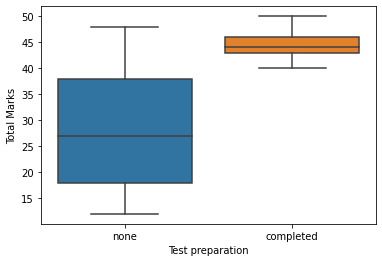

In [16]:
sns.boxplot(x='Test preparation',y='Total Marks',data=df)
plt.show()

**From boxplot its very clear that students who completed the test preparation got more marks related to those who haven't done it**